Name: Utsa Poddar
UCID: 30071131

The values of θ_0, β, ω, φ and Φ are 2.174,0.528,3.801,-0.444 and -0.763 respectively.


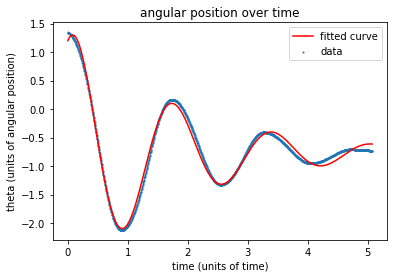

In [ ]:
import matplotlib.pylab as plt
import math
import numpy as np
from scipy.optimize import minimize, curve_fit

#function defining the damped oscillation model 
def damped_oscillation(t,param):
  theta_0,beta,omega,phi,PHI=param
  #formula for the damped oscillation
  theta=theta_0*((math.e)**(-beta*t))*math.cos(omega*t+phi)+PHI
  return theta

#function generating the y values for the model
def lines(x_points, model, params):
  #list to store the values of the generated y values
  model_list=[]
  #iterating through the list to get each each y value
  for x in x_points:
    #generating the value of y using the x value of the list
    y_model=model(x,params)
    #adding the value of y to the appropriate list
    model_list.append(y_model)
  return model_list

#function to determine the value of reduced chi squared
def reduced_chi_squared(expected,observed,uncertainty=1):
  chi_squared=0

  #expected=y_points (from the input file)
  #observed=model_list (from the function "lines")
  #putting the observed and expected values into a dictionary which will help to determine all the chi_squared values to add them up
  dict_y=dict(zip(observed,expected))
  #iterating through the dictionary to subtract the keys and values to get the value of chi squared 
  for i in dict_y:
    #updating the value of chi squared as each value of chi is determined and then added
    chi_squared+=(i-dict_y[i])**2
  #determining the N value
  N=len(dict_y)
  #determing the reduced chi squared value
  reducedchisquared=chi_squared/N
  return reducedchisquared

#making a list for the guesses of the parameters of damped oscillation
guesses =[(1,1,1,1,1)]

#lists for the x and y values from the data set
x_points = []
y_points = []
#opening the file and reading off the x and y values
with open("damped_oscillation.txt", "r") as file_open:
  for pair in file_open:
    x, y = pair.replace("\n","").split()
    x, y = float(x), float(y)
    #putting the read x and y values in their respective lists
    x_points.append(x)
    y_points.append(y)
      
#function to determine the value of reduced chi squared
def chi2_of_model(params):
  return reduced_chi_squared(y_points, lines(x_points, damped_oscillation, params))
#using the scipy.optimize.minimize to optimize the parameters 
solution=minimize(chi2_of_model, guesses[i], method='Nelder-Mead')
#getting the optimized line
min_line = lines(x_points, damped_oscillation, solution.x)

#printing the determined values of the parameters
print("The values of θ_0, β, ω, φ and Φ are %.3f,%.3f,%.3f,%.3f and %.3f respectively."%(solution.x[0],solution.x[1],solution.x[2],solution.x[3],solution.x[4]))

plt.figure()
#giving the appropriate title,legends, axis labels with units
plt.title("angular position over time")
plt.xlabel("time (units of time)")
plt.ylabel("theta (units of angular position)")

#ploting the data(blue) and the fitted curve(red) on the same figure,
plt.scatter(x_points,y_points,1,label="data")
plt.plot(x_points,min_line,'r',label="fitted curve")
plt.legend()
plt.show()

A function defining the damped oscillation model is introduced using formula from the Final assignment for damped oscillation, where theta_0, beta, omega, phi, and PHI were all parameters. Next a function generating the y values (theta) for the model (damped oscillation) is defined, which first creates a list to store the generated values of y then iterates through the x points list to get each y value and adds the value of y to the appropriate list. For the next part, the function to determine the value of reduced chi squared is defined which used the expected values (y_points from the input file) and the observed values (from the function "lines"). The observed and expected values are put into a dictionary which will help to determine all the chi_squared values to add them up. Then a for loop is used to iterate through the dictionary to subtract the keys(observed) and values(expected) to get the value of chi squared the value of chi squared is updated as each value of chi is determined and then added. Next the value of N is determined then the value of reduced chi squared is determined and a list for the guesses of the parameters of damped oscillation is created as well as, lists for the x and y values from the data set. The file is opened, and the values of x and y are reading off and then into their respective lists. Next the function to determine the value of reduced chi squared is defined and the scipy.optimize.minimize is used to optimize the parameters and get the line, and lastly the values of the determined parameters is printed, as well as the optimized line and the date lines are plotted.
